<a href="https://colab.research.google.com/github/edwardoughton/spatial_computing/blob/main/6_01_Scripting_Spatial_Processing_via_GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scripting spatial processing via GeoPandas

Today we will recap on some of the key features we learned last week in the final part of the class where we introduced `GeoPandas`.

We will cover:

* Importing data to a geopandas dataframe.
* Managing coordinate reference systems.
* Creating a new column.
* Manipulating column data in a `GeoPandas` dataframe.  
* Writing data to a `GeoPandas` dataframe.
* Converting from a `GeoPandas` dataframe to a list of dictionaries.

Remember, as a `GeoPandas` dataframe is based on a `Pandas` dataframe, you can essentially use the same coding approach and many of the same function names to execute commands.

Additionally, you should take note that here we are dealing with dataframes, which use a different syntax to the coding we carried out when utilizing native Python data structures (such as lists, dictionaries etc.). Later on, we will cover how to switch between these two important approaches.


## Recap on `GeoPandas`

`GeoPandas` is a very popular spatial data processing package based on the popular `Pandas` library.

Essentially, `GeoPandas` provides us with a range of useful spatial functions enabling us to swiftly analyze and manipulate spatial data via a dataframe structure.

* The key data structure within `GeoPandas` is a `GeoDataFrame` which essentially stores our spatial data in a `Pandas` dataframe, only with an additional geometry column containing a `Shapely` object.
* A range of spatial operations are thus available to us for use via our `GeoDataFrame` structure, including overlaying geometries, spatial joins, and geometry buffering. Via these tools we can quantify relationships between different geospatial entities, using these results for a wide range of applications (e.g., writing scientific papers, decision-support modeling etc.).
* We can easily handle importing and exporting spatial data thanks to the range of functionalities `GeoPandas` provides. This includes importing/exporting geospatial data via Shapefile, GeoJSON, GeoPackage etc. This reduces the number of lines of additional code we need to allocate to these more basic/vanilla tasks.
* Other libraries may have useful functions we want to use, and `GeoPandas` provides us with the ability to seamlessly integrate with other popular geospatial libraries. For example, we can utilize geometric operations available within Shapely and readily apply them to the geometries within our dataframe.
* Finally, `GeoPandas` does provide different plotting capabilities for visualizing geospatial data directly from a `GeoDataFrame`. Just be aware this will require Matplotlib for more basic plotting functions, or utilizing more niche libraries for more advanced mapping.

Let us get into exploring more of these capabilities using actual coding examples.



## `GeoPandas` types and subclasses

`GeoPandas` implements `GeoSeries` and `GeoDataFrame` structures, which are both subclasses of `pandas.Series` and `pandas.DataFrame`. Geometries are handled in the `geopandas.GeoSeries`, via shapely.

Therefore, your `GeoDataFrame` is a combination of `pandas.Series`, with traditional data (numerical, boolean, text etc.), and `geopandas.GeoSeries`, with geometries (points, polygons etc.).


## Importing geospatial data into `GeoPandas`

Firstly, we need to import some spatial data.

If you do not already have the files at hand from last week, go download them again from the MyMason Blackboard site.

Just remember, once you have unzipped the download, you will need to load in all associated files, including the following:

* The Shapefile (.shp) representing the primary file that stores the geometric data, such as points, lines, or polygons, thus, the spatial features in the GIS dataset.
* The Shape Index (.shx) serves as an index allows software to quickly locate the main geometric data stored in the .shp file. The .shx file improves the efficiency of reading and accessing spatial features.
* The Attribute Table (.dbf) contains the data associated with the spatial features in the shapefile and is a standard dBASE database file format, with tabular data (thus, each row corresponding to a feature in the shapefile). This file links attribute information to the geometric shapes defined in the .shp file.
* The Projection file (.prj) representing information about the coordinate system and projection used in the shapefile. This defines the spatial reference and ensures that the geographic data is interpreted correctly in terms of coordinate systems.
* The Character encoding file (.cpg) (optional) specifies the character encoding used in the attribute table (.dbf file) and is useful when dealing with non-Latin character sets.




In [2]:
# Example: Loading data from a local machine
from google.colab import files
uploaded = files.upload()

Saving virginia.cpg to virginia.cpg
Saving virginia.dbf to virginia.dbf
Saving virginia.prj to virginia.prj
Saving virginia.qmd to virginia.qmd
Saving virginia.shx to virginia.shx


Now you can import the `GeoPandas` package (as `gpd`) and then utilize the `.read_file()` function to import the shapes.

**Note**: As we know our Coordinate Reference System (CRS) is in `epsg:4326`, we specify it on import for clarity. To check this, load in your shapes into a piece of GIS software and inspect the CRS displayed (automatically selected by the GIS based on the .prj file).


In [51]:
# Example: Importing the geopandas package
import geopandas as gpd

# Example: Importing the .shp file via `.read_file()`
# As we know the crs here, we will specify it on import
gdf = gpd.read_file('virginia.shp', crs='epsg:4326')

# Example: Viewing our geodataframe
gdf.head(3)

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


GID_0         NAME_0     GID_1    NAME_1 NL_NAME_1       GID_2      NAME_2  \
0   USA  United States  USA.47_1  Virginia      None  USA.47.1_1    Accomack   
1   USA  United States  USA.47_1  Virginia      None  USA.47.2_1   Albemarle   
2   USA  United States  USA.47_1  Virginia      None  USA.47.3_1  Alexandria   

  VARNAME_2 NL_NAME_2            TYPE_2         ENGTYPE_2  CC_2    HASC_2  \
0      None      None            County            County  None  US.VA.AC   
1      None      None            County            County  None  US.VA.AB   
2      None      None  Independent City  Independent City  None  US.VA.AX   

                                            geometry  
0  MULTIPOLYGON (((-75.39167 37.87611, -75.39111 ...  
1  POLYGON ((-78.30585 38.00703, -78.48742 37.801...  
2  POLYGON ((-77.04556 38.83995, -77.04572 38.839...

You might find it easier to subset your `GeoDataframe`, which you can easily do the same way that we utilized in `Pandas`.


In [52]:
# Example: Subsetting our geodataframe
gdf = gdf[['geometry', 'NAME_1', 'NAME_2', 'TYPE_2']]
gdf.head(3)

geometry    NAME_1      NAME_2  \
0  MULTIPOLYGON (((-75.39167 37.87611, -75.39111 ...  Virginia    Accomack   
1  POLYGON ((-78.30585 38.00703, -78.48742 37.801...  Virginia   Albemarle   
2  POLYGON ((-77.04556 38.83995, -77.04572 38.839...  Virginia  Alexandria   

             TYPE_2  
0            County  
1            County  
2  Independent City

## Task

Be aware you can actually view a `Pandas` dataframe as an interactive chart if you click the blue grid button on the right hand side of the dataframe display.

The blue graph button (also on the right) will suggest potential plots for you to use.

Explore and consider how you would use these capabilities.

## Managing coordinate reference systems

Remember that we are responsible for managing our own CRS.

Therefore, it is important you check this upon loading your dataframe, if you do not already know this.

One way is to call the `.crs` function, which will provide the existing known information for this `GeoDataFrame`.


In [53]:
# Example: Checking the crs of our dataframe
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

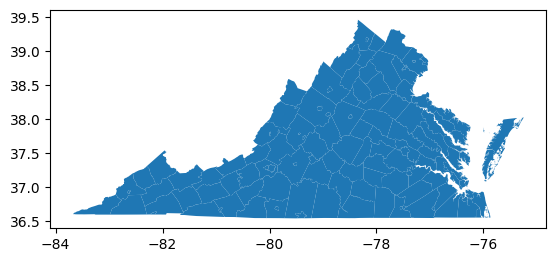

In [54]:
# Example: Plotting the data to view crs units via `.plot()`
gdf.plot()

Next, we can change the crs, if we desire, using `.to_crs()`.

You just need to specify your desired CRS as a string, containing the EPSG code.

Note: The EPSG code stands for European Petroleum Survey Group (EPSG).

In [55]:
# Example: Convert the geodataframe crs
gdf = gdf.to_crs('epsg:3857')
gdf.head(3)

geometry    NAME_1      NAME_2  \
0  MULTIPOLYGON (((-8392562.34 4561939.075, -8392...  Virginia    Accomack   
1  POLYGON ((-8716967.033 4580419.033, -8737179.5...  Virginia   Albemarle   
2  POLYGON ((-8576671.963 4698772.27, -8576689.79...  Virginia  Alexandria   

             TYPE_2  
0            County  
1            County  
2  Independent City

In [56]:
# Example: Check changed crs
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

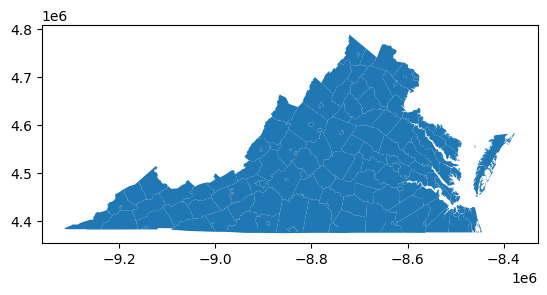

In [57]:
# Example: Plotting the data to view crs units via `.plot()`
gdf.plot()

## Creating a new column

Next, we can consider how we would create a new column in a `GeoPandas` `GeoDataFrame`.

For example, we could just create a single column with a pre-defined value for all columns (the most straight-forward example):

In [58]:
# Example: Adding a new column
gdf['new_column'] = 'I_am_a_string'
gdf['new_column2'] = 53.5
gdf['new_column3'] = 0
gdf['new_column4'] = "(2.334, 4.653)"
gdf.head(3)

geometry    NAME_1      NAME_2  \
0  MULTIPOLYGON (((-8392562.34 4561939.075, -8392...  Virginia    Accomack   
1  POLYGON ((-8716967.033 4580419.033, -8737179.5...  Virginia   Albemarle   
2  POLYGON ((-8576671.963 4698772.27, -8576689.79...  Virginia  Alexandria   

             TYPE_2     new_column  new_column2  new_column3     new_column4  
0            County  I_am_a_string         53.5            0  (2.334, 4.653)  
1            County  I_am_a_string         53.5            0  (2.334, 4.653)  
2  Independent City  I_am_a_string         53.5            0  (2.334, 4.653)

To create a more advanced case, we can find the area of each geometry in our dataset.

See the example below for information.

When you see `gdf['geometry']` you are specifically referring to the geometry column of each row, and the `Shapely` object present there.

Hence, the use of `.area` is a `Shapely` function to find the geometry area. Our CRS is in square meters.

In [59]:
# Example: Finding the area of our polygons in square meters
gdf['area_m2'] = gdf['geometry'].area
gdf.head(3)

geometry    NAME_1      NAME_2  \
0  MULTIPOLYGON (((-8392562.34 4561939.075, -8392...  Virginia    Accomack   
1  POLYGON ((-8716967.033 4580419.033, -8737179.5...  Virginia   Albemarle   
2  POLYGON ((-8576671.963 4698772.27, -8576689.79...  Virginia  Alexandria   

             TYPE_2     new_column  new_column2  new_column3     new_column4  \
0            County  I_am_a_string         53.5            0  (2.334, 4.653)   
1            County  I_am_a_string         53.5            0  (2.334, 4.653)   
2  Independent City  I_am_a_string         53.5            0  (2.334, 4.653)   

        area_m2  
0  1.982983e+09  
1  3.025502e+09  
2  6.693267e+07

If we want to then create a new column with the area in square kilometers, we would divide by 1x10^6.

In [60]:
# Example: Finding the area of our polygons in square kilometers
gdf['area_km2'] = gdf['area_m2'] / 1e6
gdf.head(3)

geometry    NAME_1      NAME_2  \
0  MULTIPOLYGON (((-8392562.34 4561939.075, -8392...  Virginia    Accomack   
1  POLYGON ((-8716967.033 4580419.033, -8737179.5...  Virginia   Albemarle   
2  POLYGON ((-8576671.963 4698772.27, -8576689.79...  Virginia  Alexandria   

             TYPE_2     new_column  new_column2  new_column3     new_column4  \
0            County  I_am_a_string         53.5            0  (2.334, 4.653)   
1            County  I_am_a_string         53.5            0  (2.334, 4.653)   
2  Independent City  I_am_a_string         53.5            0  (2.334, 4.653)   

        area_m2     area_km2  
0  1.982983e+09  1982.983239  
1  3.025502e+09  3025.501779  
2  6.693267e+07    66.932667

## Plotting

`GeoPandas` provides an easy plotting interface via the `GeoDataFrame.plot()` function.

To colorcode the map, we can pass the column of interest, like so:

<Axes: >

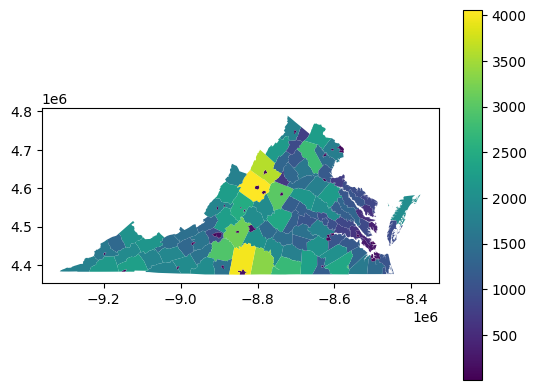

In [64]:
# Example: Plotting and visualizing the area of each polygon shape
gdf.plot("area_km2", legend=True)

In [73]:
# Example: Interactively plotting and visualizing the area of each polygon
!pip install geopandas folium mapclassify # We require some additional packages
gdf.explore("area_km2", legend=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.5 MB/s eta 0:00:00


## Manipulating column data




To manipulate a column within our dataframe, we basically write over the existing data.

For example, we could create a blank column called `area_km2` and fill the values with `NaN`, as displayed below:




In [12]:
# Example: Creating a new column
gdf['area_km2'] = 'NaN'
gdf.head(3)

geometry    NAME_1      NAME_2  \
0  MULTIPOLYGON (((-8392562.34 4561939.075, -8392...  Virginia    Accomack   
1  POLYGON ((-8716967.033 4580419.033, -8737179.5...  Virginia   Albemarle   
2  POLYGON ((-8576671.963 4698772.27, -8576689.79...  Virginia  Alexandria   

             TYPE_2     new_column  new_column2  new_column3     new_column4  \
0            County  I_am_a_string         53.5            0  (2.334, 4.653)   
1            County  I_am_a_string         53.5            0  (2.334, 4.653)   
2  Independent City  I_am_a_string         53.5            0  (2.334, 4.653)   

        area_m2 area_km2  
0  1.982983e+09      NaN  
1  3.025502e+09      NaN  
2  6.693267e+07      NaN

Continuing the area example, we would then write over the contents of this column with our desired area as follows.

The key is remembering that even though we are using different functions, this is still a `Pandas` dataframe.

Hence, we have created a new column the same way we did in the `Pandas` tutorial, we have just called the `.area` function and applied it to each geometry.

This is the common way to create a new column when working with dataframes in `Pandas`/`GeoPandas`.

In [14]:
# Example: Finding the area of our polygons
gdf['area_km2'] = gdf['geometry'].area / 1e6
gdf.head(3)

geometry    NAME_1      NAME_2  \
0  MULTIPOLYGON (((-8392562.34 4561939.075, -8392...  Virginia    Accomack   
1  POLYGON ((-8716967.033 4580419.033, -8737179.5...  Virginia   Albemarle   
2  POLYGON ((-8576671.963 4698772.27, -8576689.79...  Virginia  Alexandria   

             TYPE_2     new_column  new_column2  new_column3     new_column4  \
0            County  I_am_a_string         53.5            0  (2.334, 4.653)   
1            County  I_am_a_string         53.5            0  (2.334, 4.653)   
2  Independent City  I_am_a_string         53.5            0  (2.334, 4.653)   

        area_m2     area_km2  
0  1.982983e+09  1982.983239  
1  3.025502e+09  3025.501779  
2  6.693267e+07    66.932667

# Subsetting rows


We can subset the rows of the dataframe in a variety of ways. You need to familiarize yourself with how to subset based on the different options available.

For example, what about if we wanted to subset those with an area below the mean?



In [17]:
# Example: Subsetting rows below the mean
mean_area_km2 = gdf['area_km2'].mean()
print("The mean area of Virginia GID_2 regions is {} km2".format(mean_area_km2))

print("Currently we have {} areas (e.g., {} rows)".format(len(gdf), len(gdf)))
subset = gdf[gdf['area_km2'] < mean_area_km2]
print("Now we have {} areas (e.g., {} rows)".format(len(subset), len(subset)))
subset.head(3)

The mean area of Virginia GID_2 regions is 1242.3287046079388 km2
Currently we have 133 areas (e.g., 133 rows)
Now we have 66 areas (e.g., 66 rows)


geometry    NAME_1        NAME_2  \
2   POLYGON ((-8576671.963 4698772.27, -8576689.79...  Virginia    Alexandria   
7   POLYGON ((-8583885.071 4699304.936, -8588242.8...  Virginia     Arlington   
11  POLYGON ((-8848196.671 4487836.728, -8849099.4...  Virginia  Bedford City   

              TYPE_2     new_column  new_column2  new_column3     new_column4  \
2   Independent City  I_am_a_string         53.5            0  (2.334, 4.653)   
7             County  I_am_a_string         53.5            0  (2.334, 4.653)   
11              City  I_am_a_string         53.5            0  (2.334, 4.653)   

         area_m2    area_km2  
2   6.693267e+07   66.932667  
7   1.139977e+08  113.997658  
11  3.520764e+07   35.207637

The way to understand this code:

`subset = gdf[gdf['area_km2'] < mean_area_km2]`

Is by recognizing:

* The first part to the left of the equals allocates the results to a new df called `subset`.
* The inner layer of the square parentheses evaluates whether the `area_km2` value is below the `mean_area_km2` (leading to a value for each row of either `True` or `False`).
* The outer layer subsets all rows which evaluate to `True`.

Thus, our final dataframe is the subset of the rows with an area below the mean value.

Here is an example of the result of the inner logic utilized, which evaluates to either True or False.

In [18]:
# Example: Evaluating a piece of logic to either True or False.
gdf['area_km2'] < mean_area_km2

0      False
1      False
2       True
3      False
4      False
       ...  
128     True
129     True
130    False
131    False
132     True
Name: area_km2, Length: 133, dtype: bool

Now when you put this code together, you can change this subset logic to whatever you want, for example, when we have a string:

In [19]:
# Example: Subsetting rows equalling a string
print("Currently we have {} area(s) (e.g., {} rows)".format(len(gdf), len(gdf)))
subset = gdf[gdf['NAME_2'] == "Alexandria"]
print("Now we have {} area(s) (e.g., {} rows)".format(len(subset), len(subset)))
subset.head(3)

Currently we have 133 area(s) (e.g., 133 rows)
Now we have 1 area(s) (e.g., 1 rows)


geometry    NAME_1      NAME_2  \
2  POLYGON ((-8576671.963 4698772.27, -8576689.79...  Virginia  Alexandria   

             TYPE_2     new_column  new_column2  new_column3     new_column4  \
2  Independent City  I_am_a_string         53.5            0  (2.334, 4.653)   

        area_m2   area_km2  
2  6.693267e+07  66.932667

In [24]:
# Example: Subsetting rows equaling a string
print("Currently we have {} areas (e.g., {} rows)".format(len(gdf), len(gdf)))
subset = gdf[gdf['TYPE_2'] == "Independent City"]
print("Now we have {} areas (e.g., {} rows)".format(len(subset), len(subset)))
subset.head(3)

Currently we have 133 areas (e.g., 133 rows)
Now we have 37 areas (e.g., 37 rows)


geometry    NAME_1       NAME_2  \
2   POLYGON ((-8576671.963 4698772.27, -8576689.79...  Virginia   Alexandria   
14  POLYGON ((-9154628.471 4383036.195, -9154506.1...  Virginia      Bristol   
18  POLYGON ((-8832391.192 4545832.027, -8831406.0...  Virginia  Buena Vista   

              TYPE_2     new_column  new_column2  new_column3     new_column4  \
2   Independent City  I_am_a_string         53.5            0  (2.334, 4.653)   
14  Independent City  I_am_a_string         53.5            0  (2.334, 4.653)   
18  Independent City  I_am_a_string         53.5            0  (2.334, 4.653)   

         area_m2   area_km2  
2   6.693267e+07  66.932667  
14  4.669956e+07  46.699556  
18  2.862853e+07  28.628530

We can also subset rows based on a column, when they might have different values.

There are a lot of different ways to subset rows, so this is just one possible way using dataframes, via the `.isin()` function.

In [25]:
# Example: Subsetting rows using `.isin()`
print("Currently we have {} area(s) (e.g., {} rows)".format(len(gdf), len(gdf)))
subset = gdf[gdf['NAME_2'].isin(['Bath', 'Bedford', 'Bristol', 'Richmond'])]
print("Now we have {} area(s) (e.g., {} rows)".format(len(subset), len(subset)))
subset.head(4)

Currently we have 133 area(s) (e.g., 133 rows)
Now we have 4 area(s) (e.g., 4 rows)


geometry    NAME_1    NAME_2  \
9    POLYGON ((-8911860.222 4572994.555, -8911666.5...  Virginia      Bath   
10   POLYGON ((-8822908.754 4488664.739, -8843324.2...  Virginia   Bedford   
14   POLYGON ((-9154628.471 4383036.195, -9154506.1...  Virginia   Bristol   
105  MULTIPOLYGON (((-8526951.375 4552709.265, -852...  Virginia  Richmond   

               TYPE_2     new_column  new_column2  new_column3  \
9              County  I_am_a_string         53.5            0   
10             County  I_am_a_string         53.5            0   
14   Independent City  I_am_a_string         53.5            0   
105  Independent City  I_am_a_string         53.5            0   

        new_column4       area_m2     area_km2  
9    (2.334, 4.653)  2.240614e+09  2240.614129  
10   (2.334, 4.653)  3.179659e+09  3179.659055  
14   (2.334, 4.653)  4.669956e+07    46.699556  
105  (2.334, 4.653)  1.072210e+09  1072.210421

## Exporting data via GeoPandas

When needing to export your data, e.g., as shapefiles, there will be some differences to how you previously did this in `Pandas`.

For example, below we will import our data via `.to_file()`.

We must specify the correct CRS.

In [ ]:
# Example: Exporting your data
import geopandas as gpd

gdf = gpd.read_file('virginia.shp', crs='epsg:4326')

gdf = gdf[['GID_2', 'geometry']]

gdf.to_file('my_exported_data.shp', crs='epsg:4326')

## Obtaining polygon boundary and centroid

We previously explored obtaining boundary and centroid information for shapely objects.

Here it is equally straight forward to implement in `GeoPandas` for an entire `GeoDataFrame` of geometries, via either the `.boundary` or `.centroid` functions.

In [27]:
# Example: Obtaining polygon boundary information
import geopandas as gpd

gdf = gpd.read_file('virginia.shp', crs='epsg:4326')

gdf['boundary'] = gdf.boundary

gdf.head(3)

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


GID_0         NAME_0     GID_1    NAME_1 NL_NAME_1       GID_2      NAME_2  \
0   USA  United States  USA.47_1  Virginia      None  USA.47.1_1    Accomack   
1   USA  United States  USA.47_1  Virginia      None  USA.47.2_1   Albemarle   
2   USA  United States  USA.47_1  Virginia      None  USA.47.3_1  Alexandria   

  VARNAME_2 NL_NAME_2            TYPE_2         ENGTYPE_2  CC_2    HASC_2  \
0      None      None            County            County  None  US.VA.AC   
1      None      None            County            County  None  US.VA.AB   
2      None      None  Independent City  Independent City  None  US.VA.AX   

                                            geometry  \
0  MULTIPOLYGON (((-75.39167 37.87611, -75.39111 ...   
1  POLYGON ((-78.30585 38.00703, -78.48742 37.801...   
2  POLYGON ((-77.04556 38.83995, -77.04572 38.839...   

                                            boundary  
0  MULTILINESTRING ((-75.39167 37.87611, -75.3911...  
1  MULTILINESTRING ((-78.30585 38.00703, -78.4874...  
2  LINESTRING (-77.04556 38.83995, -77.04572 38.8...

In [29]:
# Example: Obtaining polygon centroid information
import geopandas as gpd

gdf = gpd.read_file('virginia.shp', crs='epsg:4326')

gdf['boundary'] = gdf.centroid

gdf.head(3)

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(
<ipython-input-29-e403cf0f6e29>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['boundary'] = gdf.centroid


GID_0         NAME_0     GID_1    NAME_1 NL_NAME_1       GID_2      NAME_2  \
0   USA  United States  USA.47_1  Virginia      None  USA.47.1_1    Accomack   
1   USA  United States  USA.47_1  Virginia      None  USA.47.2_1   Albemarle   
2   USA  United States  USA.47_1  Virginia      None  USA.47.3_1  Alexandria   

  VARNAME_2 NL_NAME_2            TYPE_2         ENGTYPE_2  CC_2    HASC_2  \
0      None      None            County            County  None  US.VA.AC   
1      None      None            County            County  None  US.VA.AB   
2      None      None  Independent City  Independent City  None  US.VA.AX   

                                            geometry  \
0  MULTIPOLYGON (((-75.39167 37.87611, -75.39111 ...   
1  POLYGON ((-78.30585 38.00703, -78.48742 37.801...   
2  POLYGON ((-77.04556 38.83995, -77.04572 38.839...   

                     boundary  
0  POINT (-75.64482 37.76385)  
1  POINT (-78.55622 38.02405)  
2  POINT (-77.08707 38.81862)

## Task

* Export the point and boundary information.
* Open in your chosen GIS.
* Explore and think critically about what these outputs represent.

## Converting data to and from a `GeoPandas` dataframe

Importantly, we sometimes want to convert from a dataframe to a list of dictionaries, or vice versa.

In the example below, we will import our data, convert to a list of dictionaries, and then print the contents.

The key line uses the function `.to_dict("records")` which converts the `GeoDataFrame` into a list of dicts.

In [ ]:
# Example: Converting from a GeoDataFrame to a list of dictionaries
import geopandas as gpd
gdf = gpd.read_file('virginia.shp', crs='epsg:4326')
gdf = gdf[['GID_2', 'geometry']]
list_of_dicts = gdf.to_dict("records")

for my_row in list_of_dicts:
  print(my_row)

{'GID_2': 'USA.47.1_1', 'geometry': <MULTIPOLYGON (((-75.392 37.876, -75.391 37.876, -75.391 37.876, -75.39 37.8...>}
{'GID_2': 'USA.47.2_1', 'geometry': <POLYGON ((-78.306 38.007, -78.487 37.801, -78.49 37.797, -78.49 37.792, -78...>}
{'GID_2': 'USA.47.3_1', 'geometry': <POLYGON ((-77.046 38.84, -77.046 38.84, -77.046 38.839, -77.046 38.839, -77...>}
{'GID_2': 'USA.47.4_1', 'geometry': <POLYGON ((-79.674 37.764, -79.817 37.801, -79.83 37.793, -79.845 37.784, -7...>}
{'GID_2': 'USA.47.5_1', 'geometry': <POLYGON ((-77.858 37.419, -77.859 37.416, -77.862 37.416, -77.868 37.418, -...>}
{'GID_2': 'USA.47.6_1', 'geometry': <POLYGON ((-78.875 37.543, -78.884 37.533, -78.887 37.531, -78.892 37.53, -7...>}
{'GID_2': 'USA.47.7_1', 'geometry': <POLYGON ((-78.591 37.4, -78.603 37.354, -78.594 37.348, -78.593 37.345, -78...>}
{'GID_2': 'USA.47.8_1', 'geometry': <POLYGON ((-77.11 38.844, -77.149 38.876, -77.172 38.893, -77.161 38.902, -7...>}
{'GID_2': 'USA.47.9_1', 'geometry': <POLYGON ((-78.839 3

## Task

* Subset the shapes for Northern Virginia.
* Print the unique names of these areas.
* Find the sum of the area in square kilometers (get the correct crs).
* Also, find the mean, median, minimum and maximum area in square kilometers.
* Export your shapes to a shapefile.


In [ ]:
# Enter your attempt here


## Task

Try the same set of processing tasks for the areas which contain part of Shenandoah national park.

* Subset the shapes for Shenandoah national park (should be ~7 counties).
* Print the unique names of these areas.
* Find the sum of all your areas in square kilometers (get the correct crs).
* Also, find the mean, median, minimum and maximum area in square kilometers.
* Export your shapes to a shapefile.
* Interactively visualize your data.

In [ ]:
# Enter your attempt here


## Task

Using subset functions, find the sum of the geographic area for rows categorized as "County" in the TYPE_2 column.

Now compare the descriptive statistics (mean, median, maximum, minimum) against those rows categorized as "Independent City" in the TYPE_2 column.

Export your summary statistics to a .csv file.




In [ ]:
# Enter your attempt here
